# Predicting Demand from Markdowns and Promotions

In [ ]:
options("scipen"=100, "digits"=4)

if(!require("rpart")) install.packages("rpart")
if(!require("rpart.plot")) install.packages("rpart.plot")
if(!require("Metrics")) install.packages("Metrics")

library("rpart")
library("rpart.plot")
library("Metrics")

## Building the Regression Tree Model

First lets take a look at the data we will work with. Suppose we have
the following data from 15 months of demand for some product and want to
predict the demand based on whether there was a markdown or not and also
whether or not there was a promotion.

So here is the data we have, this will be our training data:

| markdown | promotion | demand |
|----------|-----------|--------|
| yes      | yes       | 74     |
| no       | no        | 23     |
| yes      | yes       | 61     |
| yes      | yes       | 59     |
| no       | no        | 25     |
| yes      | yes       | 63     |
| no       | yes       | 54     |
| yes      | no        | 42     |
| no       | yes       | 55     |
| yes      | yes       | 75     |
| no       | no        | 13     |
| yes      | yes       | 73     |
| yes      | no        | 31     |
| no       | no        | 12     |
| no       | no        | 11     |

-   `demand` is our result or outcome
-   `markdown` (true or false), `promotion` (true or false) are the
    predictors

We hope that these predictors will help up predict the `demand`.

To start we read the training data above from a csv file and print out
its structore:

In [ ]:
trainurl<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vTT6LcnhxE-mij5m5HHdLZ77YB1_teFiPUrM2uyafkGMUHs-zSKgylLnvgEOleRCB6jatqV1JjAczkp/pub?gid=0&single=true&output=csv"
traindf<-read.csv(trainurl, stringsAsFactors=TRUE)
str(traindf)

'data.frame':   15 obs. of  3 variables:
 $ markdown : Factor w/ 2 levels "no","yes": 2 1 2 2 1 2 1 2 1 2 ...
 $ promotion: Factor w/ 2 levels "no","yes": 2 1 2 2 1 2 2 1 2 2 ...
 $ demand   : int  74 23 61 59 25 63 54 42 55 75 ...

Let’s print out the training set to make sure it looks like what we
expect:

In [ ]:
print(traindf)

   markdown promotion demand
1       yes       yes     74
2        no        no     23
3       yes       yes     61
4       yes       yes     59
5        no        no     25
6       yes       yes     63
7        no       yes     54
8       yes        no     42
9        no       yes     55
10      yes       yes     75
11       no        no     13
12      yes       yes     73
13      yes        no     31
14       no        no     12
15       no        no     11

We will try to understand how to build up a decision tree for this
example by just using one variable at a time to model the decision tree.

### Splitting on Promotion

First lets take a look at a simple model that uses just `promotion` to
try to predict `demand`.

So we are ready to see the predictions in each leaf node:

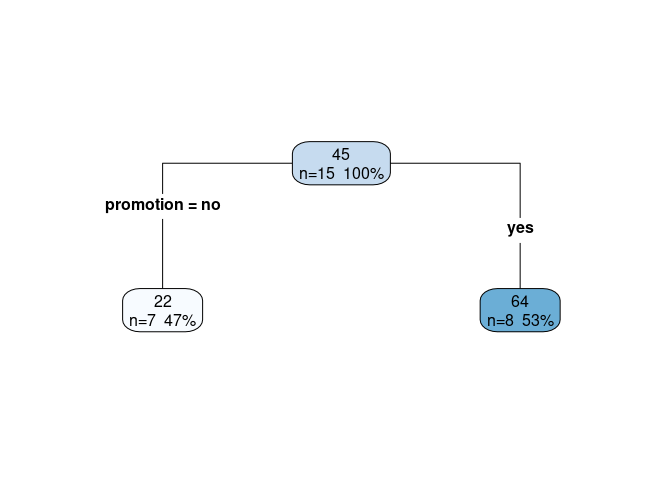

In [ ]:
control <- rpart.control(minbucket=1, maxdepth=1)
model1 <- rpart(demand~promotion, data=traindf, method="anova", control=control)
rpart.plot(model1, type=4, extra=101)

Notice that the prediction in each leaf node is just the mean over the
rows that wind up in that leaf node.

### Splitting on Markdown

Next lets look at a model that uses just `markdown` to try to predict
`demand`:

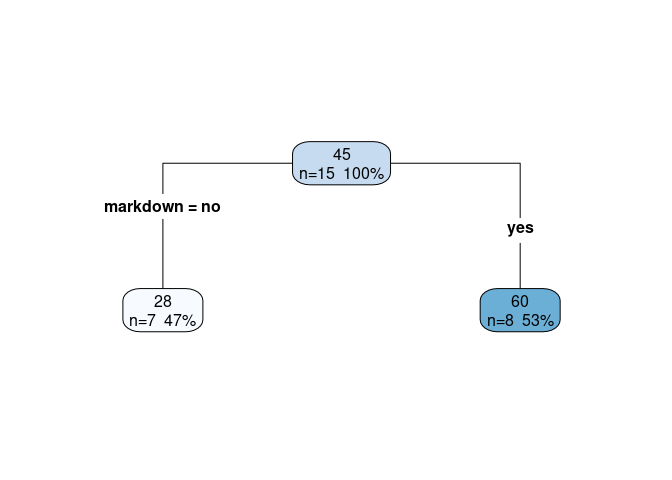

In [ ]:
control <- rpart.control(minbucket=1, maxdepth=1)
model2 <- rpart(demand~markdown, data=traindf, method="anova", control=control)
rpart.plot(model2, type=4, extra=101)

### Regression Tree built using both `markdown` and `promotion`

What about if we use both `promotion` and `markdown` together to predict
`demand`:

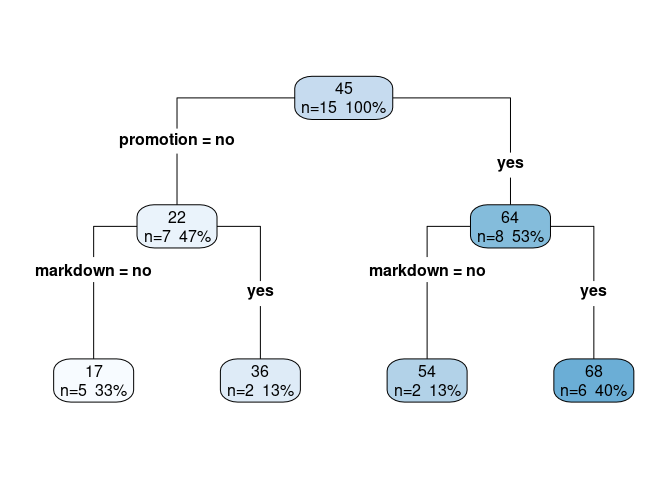

In [ ]:
control <- rpart.control(minbucket=1)
model3 <- rpart(demand~markdown+promotion, data=traindf, method="anova", control=control)
rpart.plot(model3, type=4, extra=101)

## Testing the Regression Tree

Next let’s look at some data that we can use as a testing set. This data
we will use to evaluate how well the models we looked at above will do
when they see “new” data. This gives a better idea of how accurate our
model is. So here is the data we will use as our testing data:

First we read the test set and look at its structure:

In [ ]:
testurl<-"https://docs.google.com/spreadsheets/d/e/2PACX-1vTT6LcnhxE-mij5m5HHdLZ77YB1_teFiPUrM2uyafkGMUHs-zSKgylLnvgEOleRCB6jatqV1JjAczkp/pub?gid=1414619388&single=true&output=csv"
testdf<-read.csv(testurl, stringsAsFactors=TRUE)
str(testdf)

'data.frame':   11 obs. of  3 variables:
 $ markdown : Factor w/ 2 levels "no","yes": 2 1 1 2 2 1 2 1 2 1 ...
 $ promotion: Factor w/ 2 levels "no","yes": 2 1 1 1 1 2 2 2 1 1 ...
 $ demand   : int  72 13 18 40 34 50 65 45 18 15 ...

And now print out the test set:

In [ ]:
print(testdf)

   markdown promotion demand
1       yes       yes     72
2        no        no     13
3        no        no     18
4       yes        no     40
5       yes        no     34
6        no       yes     50
7       yes       yes     65
8        no       yes     45
9       yes        no     18
10       no        no     15
11       no        no     18

### Testing `demand~promotion`

Here is the actual and the predicted for model1:

In [ ]:
pred <- predict(model1, newdata = testdf)
comparedf <- data.frame(actual=testdf$demand, predictions=pred) 
print(comparedf)

   actual predictions
1      72       64.25
2      13       22.43
3      18       22.43
4      40       22.43
5      34       22.43
6      50       64.25
7      65       64.25
8      45       64.25
9      18       22.43
10     15       22.43
11     18       22.43

Here is the MAPE, MAE and RMSE for model1:

In [ ]:
mape(testdf$demand, pred)

[1] 0.3246

[1] 9.208

[1] 10.79

### Testing `demand~markdown`

Here is the actual and the predicted for model2:

In [ ]:
pred <- predict(model2, newdata = testdf)
comparedf <- data.frame(actual=testdf$demand, predictions=pred)
print(comparedf)

   actual predictions
1      72       59.75
2      13       27.57
3      18       27.57
4      40       59.75
5      34       59.75
6      50       27.57
7      65       59.75
8      45       27.57
9      18       59.75
10     15       27.57
11     18       27.57

Here is the MAPE, MAE and RMSE for model2:

In [ ]:
mape(testdf$demand, pred)

[1] 0.6982

[1] 17.35

[1] 19.85

### Testing `demand~markdown+promotion`

Now we are ready to do some predictions using the test dataframe:

In [ ]:
pred <- predict(model3, newdata = testdf)
str(pred)

 Named num [1:11] 67.5 16.8 16.8 36.5 36.5 54.5 67.5 54.5 36.5 16.8 ...
 - attr(*, "names")= chr [1:11] "1" "2" "3" "4" ...

So `pred` now holds our predictions.

We can now compare those predictions (from our model) with the actual
known results from the testing data. Here we are comparing how our model
“predicted” on the test data with the “actual” outcomes that were
included in the testing data. Here it is important that we know the
actual outcomes on the testing data so we can see how we do.

Lets make a data frame that shows the prediction and the actuals:

In [ ]:
comparedf <- data.frame(actual=testdf$demand, predictions=pred)
print(comparedf)

   actual predictions
1      72        67.5
2      13        16.8
3      18        16.8
4      40        36.5
5      34        36.5
6      50        54.5
7      65        67.5
8      45        54.5
9      18        36.5
10     15        16.8
11     18        16.8

Here is the MAPE, MAE and RMSE for our best model (model3):

In [ ]:
mape(testdf$demand, pred)

[1] 0.1942

[1] 4.864

[1] 6.864